<a href="https://colab.research.google.com/github/bibekyess/AI_practice/blob/main/SG_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is referred from https://github.com/KaihuaTang/Scene-Graph-Benchmark.pytorch/blob/master/visualization/3.visualize_custom_SGDet.ipynb.

In [73]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [74]:
gdrive_path = '/content/gdrive/My Drive/RIRO Intern/visualize_scene_graphs'

In [75]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open(f'{gdrive_path}/custom_prediction_multi_attri.json'))
custom_data_info = json.load(open(f'{gdrive_path}/custom_data_info_multi_attri.json'))

In [ ]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])

    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
      info = str(i) + '_' + box_labels[i] + '--' + attr_labels_new[i][0]
      draw_single_box(pic, boxes[i], draw_info=info)

    display(pic)

    # pic.save(f"{gdrive_path}/result_1.png") 

    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [ ]:
# parameters
ind_to_classes = custom_data_info['ind_to_classes']
ind_to_predicates = custom_data_info['ind_to_predicates']
ind_to_attributes = custom_data_info['ind_to_attributes']

In [ ]:
for i in range(len(custom_data_info['idx_to_files'])):
    file_path = custom_data_info['idx_to_files'][i]
    custom_data_info['idx_to_files'][i] = gdrive_path + "/" + file_path.split("/")[-1]
custom_data_info['idx_to_files']

['/content/gdrive/My Drive/RIRO Intern/visualize_scene_graphs/2.jpg',
 '/content/gdrive/My Drive/RIRO Intern/visualize_scene_graphs/318.jpg',
 '/content/gdrive/My Drive/RIRO Intern/visualize_scene_graphs/489.jpg',
 '/content/gdrive/My Drive/RIRO Intern/visualize_scene_graphs/987.jpg',
 '/content/gdrive/My Drive/RIRO Intern/visualize_scene_graphs/18.jpg']

{'url': '', 'objects': [{'name': '0_Ketchup'}, {'name': '1_OrangeJuice'}, {'name': '2_table'}, {'name': '3_MacaroniAndCheese'}, {'name': '4_ChocolatePudding'}, {'name': '5_Milk'}], 'attributes': [{'attribute': 'red', 'object': 0}, {'attribute': 'condiment', 'object': 0}, {'attribute': 'clear', 'object': 0}, {'attribute': 'box', 'object': 1}, {'attribute': 'orange', 'object': 1}, {'attribute': 'clear', 'object': 1}, {'attribute': 'box', 'object': 2}, {'attribute': 'red', 'object': 2}, {'attribute': 'orange', 'object': 2}, {'attribute': 'box', 'object': 3}, {'attribute': 'red', 'object': 3}, {'attribute': 'clear', 'object': 3}, {'attribute': 'box', 'object': 4}, {'attribute': 'red', 'object': 4}, {'attribute': 'skyblue', 'object': 4}, {'attribute': 'brown', 'object': 4}, {'attribute': 'clear', 'object': 4}, {'attribute': 'box', 'object': 5}, {'attribute': 'red', 'object': 5}, {'attribute': 'clear', 'object': 5}], 'relationships': [{'predicate': 'on', 'subject': 0, 'object': 2}, {'predica

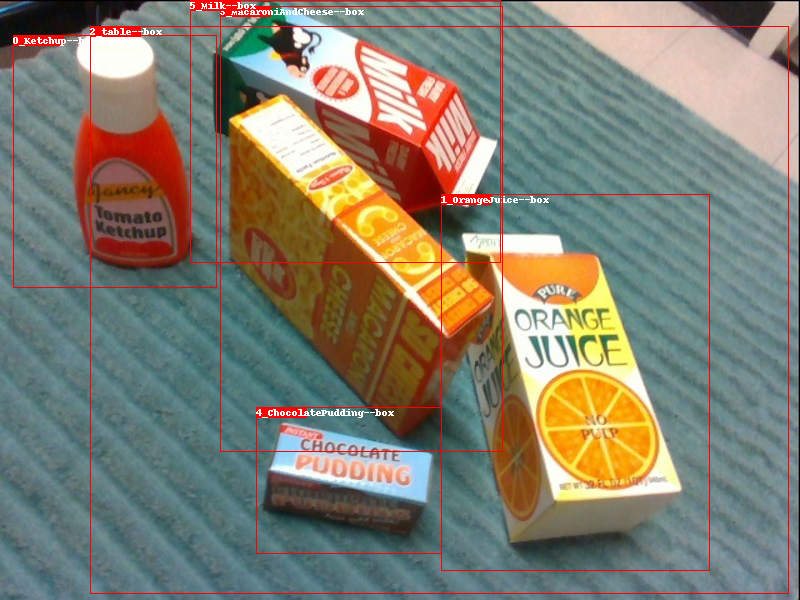

**************************************************
box_labels 0: Ketchup; score: 0.999581515789032
box_labels 1: OrangeJuice; score: 0.9969425797462463
box_labels 2: table; score: 0.7020988464355469
box_labels 3: MacaroniAndCheese; score: 0.4032209515571594
box_labels 4: ChocolatePudding; score: 0.3401258587837219
box_labels 5: Milk; score: 0.3233596980571747
**************************************************
rel_labels 0: 0_Ketchup => on => 2_table; score: 0.9999982118606567
rel_labels 1: 4_ChocolatePudding => on => 2_table; score: 0.9999063014984131
rel_labels 2: 3_MacaroniAndCheese => on => 2_table; score: 0.9843856692314148
rel_labels 3: 1_OrangeJuice => on => 2_table; score: 0.9797742962837219
rel_labels 4: 5_Milk => on => 2_table; score: 0.9073530435562134


In [ ]:
image_idx = 0 # selects which image to use from the list of images
image_path = custom_data_info['idx_to_files'][image_idx]
boxes = custom_prediction[str(image_idx)]['bbox']
box_labels = custom_prediction[str(image_idx)]['bbox_labels'].copy()
box_scores = custom_prediction[str(image_idx)]['bbox_scores'].copy()
attr_labels = custom_prediction[str(image_idx)]['attr_labels'].copy()
attr_scores = custom_prediction[str(image_idx)]['attr_scores'].copy()
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels'].copy()
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores'].copy()
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs'].copy()

objects=[]
relationships=[]
test = [] # To only extract the relationships of the objects with higher confidence.

boxes_new = []
box_labels_new = []
box_scores_new = []
attr_labels_new = []
attr_scores_new = []

for i in range(len(box_labels)):
    if box_scores[i] > 0.1: 
        boxes_new.append(boxes[i])
        box_labels_new.append(ind_to_classes[box_labels[i]])
        box_labels[i] = ind_to_classes[box_labels[i]] # Just for checking later

        box_scores_new.append(box_scores[i])

        temp_labels = []
        for j in attr_labels[i]:
          temp_labels.append(ind_to_attributes[j])
        attr_labels_new.append(temp_labels)
        attr_scores_new.append(attr_scores[i])

        objects.append({"name": str(i) + '_' + box_labels[i]})
        test.append(str(i) + '_' + box_labels[i])

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):        
        if ((str(all_rel_pairs[i][0]) + '_' + str(box_labels[all_rel_pairs[i][0]])  in test) and (str(all_rel_pairs[i][1]) + '_' + str(box_labels[all_rel_pairs[i][1]]) in test)):
            subject_index = test.index(str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]])
            object_index = test.index(str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]])
            if all_rel_scores[i] > 0.2:
                relationships.append({"predicate":  ind_to_predicates[all_rel_labels[i]], "subject": subject_index , "object": object_index})
                label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
                rel_scores.append(all_rel_scores[i])
                rel_labels.append(label)

attr = []
for i in range(len(box_labels_new)):
  for c, j in enumerate(attr_labels_new[i]):
    if attr_scores_new[i][c] > 0.2:
      attr.append({'attribute': j, 'object': i})
  if (box_labels_new[i] != 'table'):
    attr.append({'attribute': 'clear', "object": i})

viz_result = {"url": "", "objects": objects, "attributes": attr, "relationships": relationships}
print(viz_result)
draw_image(image_path, boxes_new, box_labels_new, rel_labels, box_scores=box_scores_new, rel_scores=rel_scores)